In [76]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import set_matplotlib_formats
import seaborn as sns
import jax.numpy as jnp
from jax import lax, random
from jax.scipy.special import expit

import numpyro
import numpyro.distributions as dist
from numpyro.diagnostics import print_summary
from numpyro.infer import ELBO, MCMC, NUTS, SVI, Predictive, init_to_value, init_to_sample, init_to_median, init_to_feasible
from numpyro.infer.util import initialize_model

In [2]:
# https://www.tensorflow.org/probability/examples/TensorFlow_Probability_on_JAX
# - these currently need pip install tfp-nightly[jax]  (but not full TF)
from numpyro.contrib.tfp.distributions import Weibull

In [3]:
with numpyro.handlers.seed(rng_seed=2971):
    numpyro.sample("a", Weibull(1, 5).expand([1]))
    #numpyro.sample("a", dist.Normal(178, 20))

(array([64., 80., 86., 74., 84., 75., 61., 57., 56., 40., 40., 37., 28.,
        31., 27., 13., 18., 20., 14., 16., 13., 12., 10.,  5.,  7.,  4.,
         2.,  6.,  3.,  2.,  0.,  2.,  4.,  1.,  0.,  1.,  2.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([2.9200172e-01, 1.1823912e+01, 2.3355822e+01, 3.4887733e+01,
        4.6419643e+01, 5.7951553e+01, 6.9483459e+01, 8.1015373e+01,
        9.2547287e+01, 1.0407919e+02, 1.1561111e+02, 1.2714301e+02,
        1.3867493e+02, 1.5020683e+02, 1.6173874e+02, 1.7327066e+02,
        1.8480257e+02, 1.9633447e+02, 2.0786638e+02, 2.1939830e+02,
        2.3093021e+02, 2.4246211e+02, 2.5399403e+02, 2.6552594e+02,
        2.7705786e+02, 2.8858975e+02, 3.0012167e+02, 3.1165356e+02,
        3.2318549e+02, 3.3471741e+02, 3.4624930e+02, 3.5778122e+02,
        3.6931314e+02, 3.8084503e+02, 3.9237695e+02, 4.0390884e+02,
        4.1544077e+02, 4.2697269e+02, 4.3850458e+02, 4.5003650e+02,
        4.6156842e+02, 4.7310031e+02

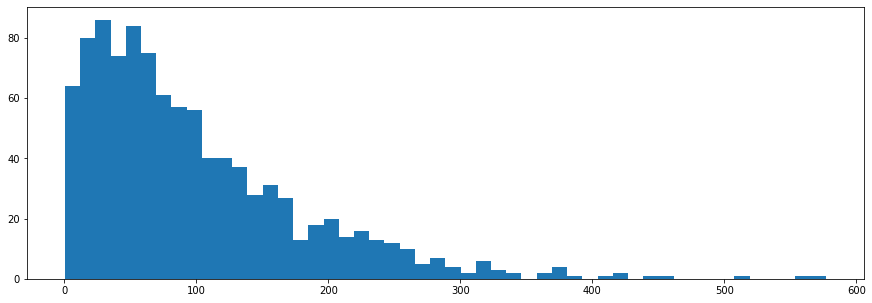

In [4]:
N = 1000
samples = Weibull(1.2, 100).expand([N])(rng_key=random.PRNGKey(123))

plt.figure(figsize=(15,5))
plt.hist(samples, bins=50)

In [5]:
Weibull(10,1).sample(seed=random.PRNGKey(0))

DeviceArray(0.9406013, dtype=float32)

In [6]:
a = 692
b = 3.745
x = jnp.linspace(0.1,1000,1000)

rhs = b * jnp.log(x) - b * jnp.log(a)
f_x = 1 - jnp.exp(-jnp.exp(rhs))

In [7]:
jnp.log(-jnp.log(1-0.125))
b * jnp.log(660) - b * jnp.log(a)

DeviceArray(-0.17731094, dtype=float32)

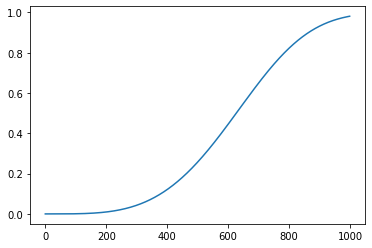

In [8]:
plt.plot(range(1000), f_x)

---

(array([ 8., 19., 23., 43., 54., 57., 70., 49., 65., 55., 67., 55., 49.,
        48., 41., 39., 35., 29., 18., 20., 19., 15., 22., 14., 10., 13.,
         9., 10.,  9.,  6.,  2.,  2.,  3.,  3.,  6.,  1.,  4.,  0.,  0.,
         1.,  2.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 0.202951  ,  0.42865446,  0.65435797,  0.88006145,  1.1057649 ,
         1.3314683 ,  1.5571718 ,  1.7828753 ,  2.0085788 ,  2.2342823 ,
         2.4599857 ,  2.6856892 ,  2.9113927 ,  3.1370962 ,  3.3627996 ,
         3.5885031 ,  3.8142066 ,  4.0399103 ,  4.2656136 ,  4.4913173 ,
         4.7170205 ,  4.942724  ,  5.1684275 ,  5.394131  ,  5.6198344 ,
         5.845538  ,  6.0712414 ,  6.296945  ,  6.5226483 ,  6.748352  ,
         6.9740553 ,  7.199759  ,  7.4254622 ,  7.651166  ,  7.876869  ,
         8.102572  ,  8.328277  ,  8.55398   ,  8.779683  ,  9.005386  ,
         9.231091  ,  9.456794  ,  9.682497  ,  9.9082    , 10.133904  ,
        10.359608  , 10.585311  , 10.811014  , 11.036718  ,

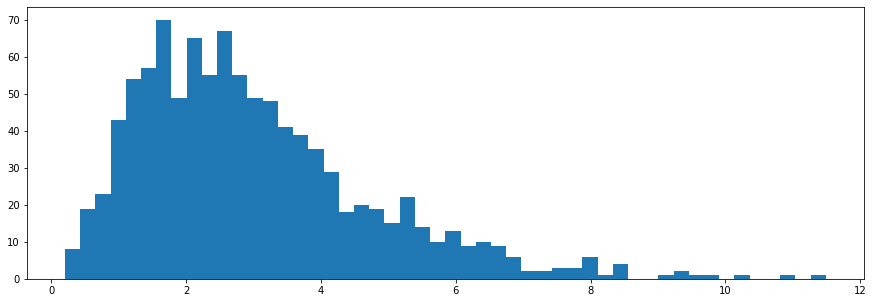

In [9]:
with numpyro.handlers.seed(rng_seed=2971):
    X = numpyro.sample("x", dist.Gamma(3,1).expand([N]))

plt.figure(figsize=(15,5))
plt.hist(X, bins=50)

size  deps  friction  durations  friction_std  durations_norm
0     1     4  1.853077   6.669429     -0.511445        0.164024
1     3     3  0.197228   9.451065     -0.935350        0.245177
2     2     0  3.508350   9.967940     -0.087688        0.260256
3     1     0  4.700499   8.816259      0.217508        0.226656
4     1     3  1.107548   5.480636     -0.702304        0.129341

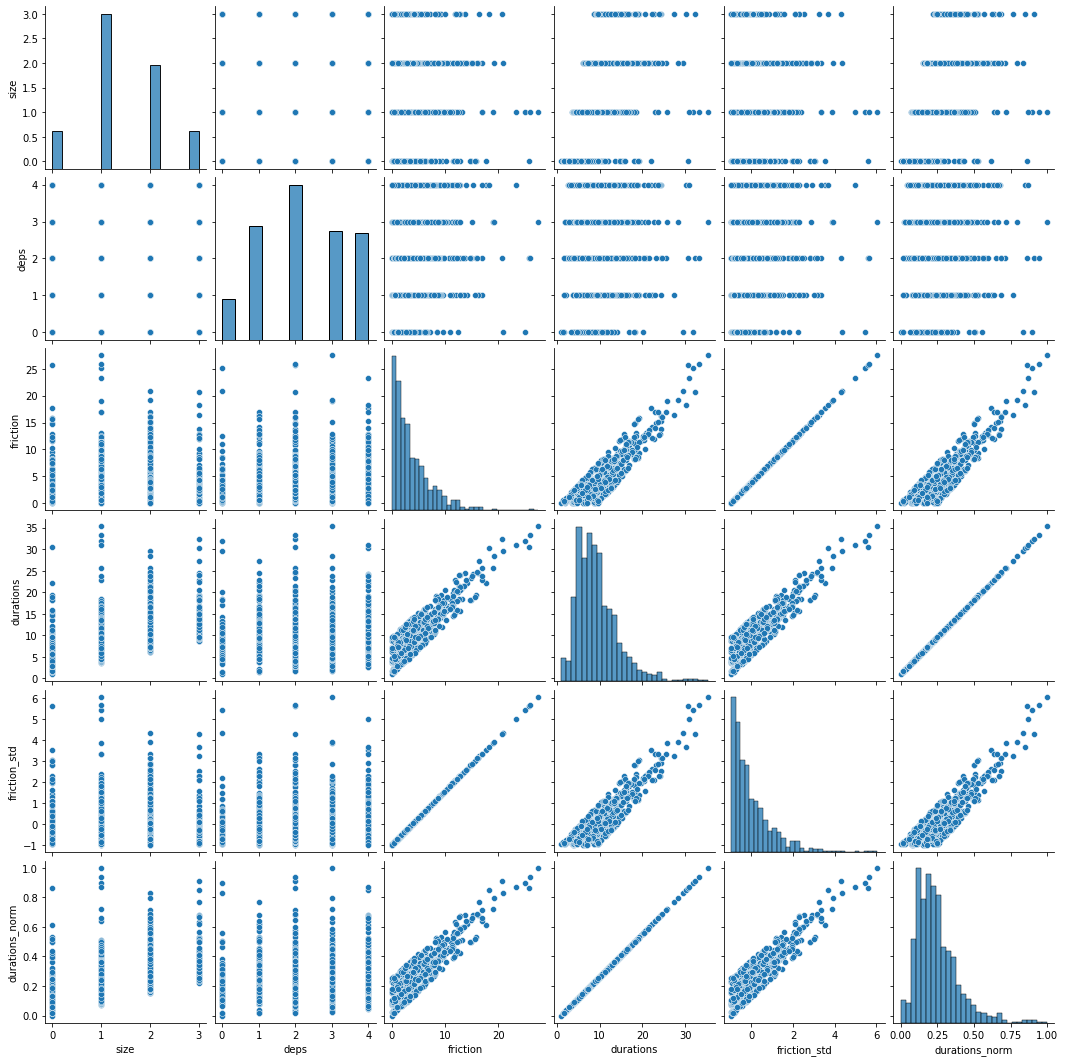

In [25]:
import numpy as np
import random as rand

N = 1000

size = jnp.array(rand.choices([0,1,2,3], [0.1,0.4,0.3,0.1], k=1000))
deps = jnp.array(rand.choices([x for x in range(5)], [0.1,0.2,0.3,0.2,0.2], k=1000))
friction = np.random.gamma(1,4,size=N)

durations = 2.5 * size + 1.2 ** deps + 2 * friction * 0.6 * (0.5 + rand.random())
df = pd.DataFrame(dict(
    size=size, deps=deps, friction=friction, durations=durations,
))
df["friction_std"] = (df.friction - df.friction.mean()) / df.friction.std()
df["durations_norm"] = (df.durations - df.durations.min()) / (df.durations.max() - df.durations.min())
display(df.head())
sns.pairplot(df)

<AxesSubplot:ylabel='Density'>

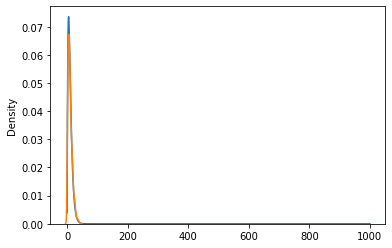

In [11]:
from scipy.stats import gamma
plt.plot(x, gamma.pdf(x, 2, loc=0, scale=5))
sns.kdeplot(dist.Gamma(2, 1/5).sample(random.PRNGKey(0), (1000,)))

In [103]:
def model(size, deps, friction, durations=None):
    min_value = jnp.finfo(np.dtype('float32')).eps
    max_value = jnp.finfo(np.dtype('float32')).max

    #intercept = numpyro.sample(f"beta_intercept", dist.Normal(0.0, 1.0))
    s = numpyro.sample("s", dist.Normal(0,10).expand([len(set(size))]))
    d = numpyro.sample("d", dist.Normal(0,10).expand([len(set(deps))]))
    bF = numpyro.sample("bF", dist.Normal(0,10))

    mean = numpyro.deterministic(
        "mean",
        jnp.clip(jnp.exp(
            #intercept +
            s[size] +  d[deps] + bF * friction
        ), a_min=min_value, a_max=max_value)
    )
    
    # We will also define a rate parameter
    rate = jnp.clip(numpyro.sample("rate", dist.HalfCauchy(1)), a_min=min_value)
    
    # Since mean = shape/rate, then the shape = mean * rate
    shape = numpyro.deterministic("shape", mean * rate)
    
    # Now that we have the shape and rate parameters for the
    # Gamma distribution, we can draw samples from it and condition
    # them on our observations
    # with pyro.plate("data", y.shape[0]):

    numpyro.sample("duration", dist.Gamma(shape, rate), obs=durations)

mcmc = MCMC(NUTS(model, init_strategy=init_to_median), 1000, 2000,
        #chain_method="vectorized",
    # *initialize_model(
    #     random.PRNGKey(0),
    #     model,
        
    #     model_kwargs=dict(
    #         size=df['size'].values,
    #         deps=df.deps.values,
    #         friction=df.friction_std.values,
    #         durations=df.durations.values
    #     )
    # )
)
mcmc.run(random.PRNGKey(0),
    size=df['size'].values,
    deps=df.deps.values,
    friction=df.friction_std.values,
    durations=df.durations.values
)
mcmc.print_summary()

sample: 100%|██████████| 3000/3000 [01:23<00:00, 36.12it/s, 15 steps of size 2.08e-03. acc. prob=0.92]  

                mean       std    median      5.0%     95.0%     n_eff     r_hat
        bF      0.32      0.00      0.32      0.32      0.33    472.74      1.00
      d[0]      0.37      2.88      0.29     -4.26      5.03     51.89      1.00
      d[1]      0.43      2.88      0.35     -4.16      5.09     51.93      1.00
      d[2]      0.45      2.88      0.37     -4.15      5.10     51.91      1.00
      d[3]      0.48      2.88      0.40     -4.12      5.13     51.90      1.00
      d[4]      0.52      2.88      0.45     -4.07      5.17     51.92      1.00
      rate      4.27      0.19      4.26      3.99      4.58    272.30      1.00
      s[0]      1.23      2.88      1.31     -3.42      5.87     51.90      1.00
      s[1]      1.59      2.88      1.67     -3.06      6.19     51.92      1.00
      s[2]      1.88      2.88      1.95     -2.78      6.47     51.91      1.00
   

(array([ 70., 257., 243., 169., 103.,  58.,  31.,  16.,  12.,   6.,   9.,
          4.,   3.,   3.,   5.,   1.,   1.,   1.,   0.,   2.,   0.,   2.,
          0.,   1.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([ 3.58173  ,  5.303708 ,  7.0256863,  8.747664 , 10.469643 ,
        12.191621 , 13.913599 , 15.635577 , 17.357555 , 19.079535 ,
        20.801512 , 22.52349  , 24.245468 , 25.967447 , 27.689425 ,
        29.411404 , 31.133383 , 32.855362 , 34.57734  , 36.299316 ,
        38.021294 , 39.743275 , 41.465252 , 43.18723  , 44.909206 ,
        46.631187 , 48.353165 , 50.07514  , 51.79712  , 53.5191   ,
        55.241077 ], dtype=float32),
 <BarContainer object of 30 artists>)

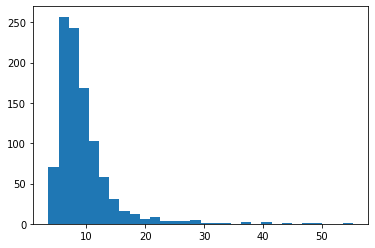

In [115]:
post_samples = mcmc.get_samples()
post = Predictive(model, post_samples, return_sites=["duration"])(
    random.PRNGKey(3), size=df['size'].values, deps=df.deps.values,
    friction=df.friction_std.values
    #**{col: df[col].values for col in ['']}
)
post_durations = post["duration"]

# p_mean = jnp.mean(post_p, 0)
# p_HPDI = hpdi(post_p, 0.89)

In [90]:
print(
    jnp.mean(mcmc.get_samples()["mean"]),
    jnp.mean(mcmc.get_samples()["rate"]),
    jnp.mean(mcmc.get_samples()["shape"])
)

9.463541 4.267065 40.380478


<AxesSubplot:xlabel='durations', ylabel='Density'>

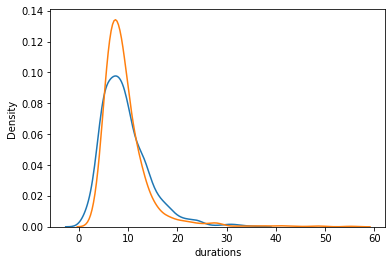

In [133]:
# plt.hist(df.durations, bins=14)
# plt.hist(jnp.mean(post_durations, 0), bins=30, alpha=0.4)
sns.kdeplot(df.durations)
sns.kdeplot(jnp.mean(post_durations, 0))
#plt.hist(np.random.gamma(40,1/4.2,size=1000), alpha=0.4)